In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

# 1 Deteção de Anomalias

Nesta parte, vocˆe implementar ́a um algoritmo de detecc ̧ ̃ao de anomalia para detectar comportamentos anˆomalos nos servidores de um centro de dados. As caracter ́ısticas medem a vaz ̃ao (throughput) (mb/s) e a latˆencia (ms) de res- posta de cada servidor. Enquanto seus servidores estavam funcionando, foram coletados m = 307 exemplos de como eles estavam se comportando. H ́a a sus- peita de que a grande maioria desses exemplos s ̃ao exemplos ”normais”(n ̃ao anˆomalos) dos servidores que operam normalmente, mas tamb ́em pode haver alguns exemplos de servidores que atuam de forma anˆomala nesse conjunto de dados.
    Vocˆe usar ́a um modelo gaussiano para detectar exemplos anˆomalos em seu conjunto de dados. Vocˆe usar ́a um conjunto de dados 2D que permitir ́a que vocˆe visualize o que o algoritmo est ́a fazendo. Nesse conjunto de dados, vocˆe ajustar ́a uma distribuic ̧ ̃ao gaussiana e ent ̃ao encontrar ́a valores que tˆem probabilidade muito baixa e, portanto, podem ser considerados anomalias.


# 1.1 Distribui ̧c ̃ao Gaussiana

Para realizar a detecc ̧ ̃ao de anomalia, vocˆe precisar ́a primeiro ajustar um modelo a distribui ̧c ̃ao dos dados.
Dado um conjunto de treinamento {x(1), . . . , x(m)} (onde x(i) ∈ Rn), vocˆe deve estimar a distribui ̧c ̃ao gaussiana para cada uma das caracter ́ısticas xj. Para cada caracter ́ıstica j = 1, . . . , n, vocˆe precisa encontrar os parˆametros μj e σj2 que se encaixam nos dados na j- ́esima dimens ̃ao x(1),...,x(m) (a j- ́esima dimens ̃ao de cada exemplo).
A distribui ̧c ̃ao gaussiana  ́e dada por: 

            $ ... $


# 1.2 Estimativa de parˆametros para uma gaussiana

Vocˆe pode estimar os parˆametros, (μj,σj2), da j- ́esima caracter ́ıstica usando as equa ̧c ̃oes apresentadas em aula.
Sua tarefa  ́e implementar c ́odigo em um arquivo de nome estimativaGaus- sian.py, que deve conter uma func ̧ ̃ao de mesmo nome. Esta fun ̧c ̃ao toma como entrada a matriz de dados X e deve produzir um vetor de dimens ̃ao n mu que cont ́em a m ́edia de todas as caracter ́ısticas n e outro vetor de dimens ̃ao n sigma2 que cont ́em as variˆancias de todas as caracter ́ısticas.

Uma vez que vocˆe tenha completado o c ́odigo em estimativaGaussian.py, sua pr ́oxima tarefa ser ́a visualizar os contornos da distribui ̧c ̃ao gaussiana ajustada. Vocˆe deve obter um gr ́afico semelhante a Figura 1. Dessa figura, vocˆe pode ver que a maioria dos exemplos est ́a na regi ̃ao com maior probabilidade, enquanto os exemplos anˆomalos est ̃ao nas regi ̃oes com probabilidades menores.

# 1.3 Selecionando $\epsilon$

Agora que vocˆe avaliou os paraˆmetros gaussianos, vocˆe pode investigar quais
exemplos tˆem uma probabilidade muito alta dada essa distribuic ̧ ̃ao e quais
exemplos tˆem uma probabilidade muito baixa. Os exemplos de baixa probabili-
dade s ̃ao mais prov ́aveis de ser as anomalias em nosso conjunto de dados. Uma
maneira de determinar quais exemplos s ̃ao anomalias  ́e selecionar um limite
ε com base em um conjunto de valida ̧c ̃ao cruzada. Nesta parte do exerc ́ıcio,
vocˆe implementar ́a um algoritmo para selecionar o limite ε usando a medida F1
em um conjunto de valida ̧c ̃ao cruzada. Vocˆe deve implementar c ́odigo em um
arquivo de nome selectThreshold.py. Para isso, use um conjunto de valida ̧c ̃ao
cruzada {(x(1),y(1)),...,x(m),y(m))}, onde o r ́otulo y = 1 corresponde a uma cv cv cv cv
exemplo anˆomalo. Para cada exemplo no conjunto de valida ̧c ̃ao, vocˆe deve com- putar Pr(x(i)). O vetor de todas essas probabilidades Pr(x(1)),...,Pr(x(mcv)),
cv cv cv
assim como os r ́otulos correspondentes, devem ser passados a fun ̧c ̃ao implemen- tada em selectThreshold.py.
A fun ̧c ̃ao selectThreshold.py deve retornar dois valores; o primeiro  ́e o limite selecionado ε. Se um exemplo x tiver uma baixa probabilidade Pr(x) < ε, ent ̃ao

In [10]:
data1 = loadmat('am-T2-dados/ex8data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [11]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (307, 2)


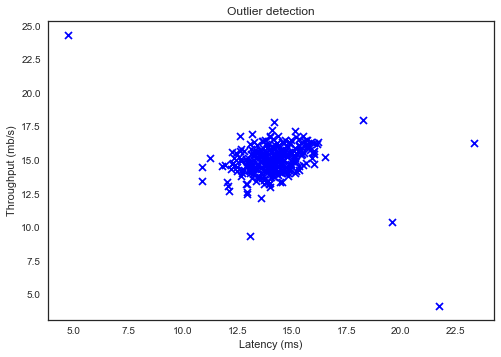

In [12]:
plt.scatter(X1[:,0], X1[:,1], c='b', marker='x')
plt.title("Outlier detection")
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

In [13]:
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

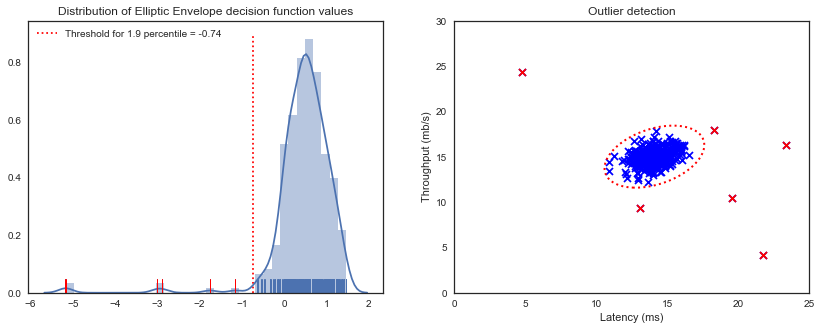

In [20]:
# Create the grid for plotting
xx, yy = np.meshgrid(np.linspace(0, 25, 200), np.linspace(0, 30, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Calculate the decision function and use threshold to determine outliers
y_pred = clf.decision_function(X1).ravel()
percentile = 1.9
threshold = np.percentile(y_pred, percentile)
outliers = y_pred < threshold

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# Left Graphics - Plot the decision function values
sns.distplot(y_pred, rug=True, ax=ax1)

# Plot the decision function values for the outliers in red
sns.distplot(y_pred[outliers], rug=True, hist=False, kde=False, norm_hist=True, color='r', ax=ax1)
legenda = 'Threshold for {} percentile = {}'.format(percentile, np.round(threshold, 2))

ax1.vlines(threshold, 0, 0.9, colors='r', linestyles='dotted', label=legenda)
ax1.set_title('Distribution of Elliptic Envelope decision function values');
ax1.legend(loc='best')

# Right Graphics - Plot the observations
ax2.scatter(X1[:,0], X1[:,1], c='b', marker='x')

# Plot outliers
ax2.scatter(X1[outliers][:,0], X1[outliers][:,1], c='r', marker='x', linewidths=2)
# Plot decision boundary based on threshold
ax2.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red', linestyles='dotted')
ax2.set_title("Outlier detection")
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Throughput (mb/s)');

# 2. Sistemas de Recomendação

Nesta parte, vocˆe implementar ́a o algoritmo de aprendizagem de filtragem co- laborativa e aplic ́a-lo- ́a a um conjunto de dados de avalia ̧c ̃oes de filmes1. Este conjunto de dados consiste em classifica ̧c ̃oes em uma escala de 1 a 5. O conjunto de dados tem nu = 943 usu ́arios e nm = 1682 filmes. O arquivo que cont ́em o conjunto de dados tem nome ex8 movies.mat, e cont ́em as vari ́aveis Y e R.


# 2.1 Conjunto de dados de classificações de filme

A matriz Y (de ordem nu ́mero de filmes x nu ́mero de usua ́rios) armazena as classifica ̧c ̃oes y(i,j) (de 1 a 5). A matriz R  ́e uma matriz de indicadores de valor bin ́ario, onde R(i, j) = 1 se o usu ́ario j forneceu uma classificac ̧ ̃ao para o filme i e R(i, j) = 0 em caso contr ́ario. O objetivo da filtragem colaborativa  ́e prever as classificac ̧ ̃oes de filmes para os filmes que os usu ́arios ainda n ̃ao classificaram, ou seja, as entradas com R(i, j) = 0. Isso permitir ́a recomendar os filmes com classifica ̧c ̃oes mais altas previstas para outros usu ́arios.
Ao longo desta parte, vocˆe tamb ́em estar ́a trabalhando com as matrizes, X e Theta. Essas vari ́aveis se encontram no arquivo ex8 movieParams.mat. A i- ́esima linha de X corresponde ao vetor de caracter ́ıstica x(i) para o i- ́esimo filme. A j- ́esima linha de Theta corresponde a um vetor de parˆametros θ(j), para o j- ́esimo usu ́ario. Tanto x(i) quanto θ(j) s ̃ao vetores n-dimensionais. Para os fins deste exerc ́ıcio, vocˆe usara ́ n = 100 e, portanto, x(i) ∈ R100 e θ(j) ∈ R100. Correspondentemente, X  ́e uma matriz nm ×100 e T heta  ́e uma matriz nu ×100.

# 2.2 Algoritmo de aprendizagem de filtragem colaborativa

Agora, vocˆe vai come ̧car a implementar o algoritmo de filtragem colaborativa. Vocˆe iniciar ́a implementando a fun ̧c ̃ao de custo (sem regulariza ̧c ̃ao). O algo- ritmo de filtragem colaborativa no contexto das recomenda ̧c ̃oes de filmes con- sidera um conjunto de vetores de parˆametros n-dimensionais x(i), . . . , x(nm) e θ(1),...,θ(nu), onde o modelo prediz a avaliac ̧ ̃ao para o filme i pelo usu ́ario j como y(i,j) = (θ(j))T x(i). Dado um conjunto de dados que consiste em um conjunto de avalia ̧c ̃oes produzidas por alguns usu ́arios para alguns filmes, o al- goritmo deve aprender os vetores de parˆametros x(i), . . . , x(nm) e θ(1), . . . , θ(nu) que produzem o melhor ajuste (i.e., minimizam o erro quadr ́atico).
Vocˆe dever ́a implementar co ́digo em um arquivo de nome cofiCostFunc.py para calcular a fun ̧c ̃ao de custo e o gradiente para a filtragem colaborativa. Os parˆametros para a fun ̧c ̃ao (ou seja, os valores que vocˆe est ́a tentando aprender) devem ser X e Theta.


# 2.2.1 Função de custo da filtragem colaborativa

A fun ̧c ̃ao de custo para a filtragem colaborativa (sem regulariza ̧c ̃ao)  ́e dada por J(x(i), . . . , x(nm), θ(1), . . . , θ(nu)) = 1   ((θ(j))T x(i) − y(i,j))2.
2
Vocˆe deve implementar c ́odigo em cofiCostFunc.py para retornar esse custo em uma vari ́avel de nome J. Note que vocˆe deve acumular o custo para o usu ́ario j e o filme i somente se R(i,j) = 1.
Depois de implementar a fun ̧c ̃ao, vocˆe deve test ́a-la. Vocˆe deve ver uma sa ́ıda de 22,22.

# 2.2.2 Gradiente de filtragem colaborativa

Agora, vocˆe deve implementar o gradiente (sem regularizac ̧ ̃ao). Especifica- mente, vocˆe deve implementar c ́odigo em cofiCostFunc.py para retornar as vari ́aveis X grad e Theta grad. Observe que X grad deve ser uma matriz do mesmo tamanho que X e, de forma semelhante, Theta grad  ́e uma matriz do mesmo tamanho que Theta. Os gradientes da fun ̧c ̃ao de custo s ̃ao dados por:

# 3. O que deve ser entregue

Vocˆe deve preparar um u ́nico relat ́orio para a apresentar sua an ́alise e conclus ̃oes sobre as diversas partes desse trabalho. O formato desse relat ́orio deve ser em PDF. Alternativamente a entrega do relat ́orio em PDF, vocˆe pode entregar um notebook Jupyter2.
Independente de escolher entregar um relat ́orio em PDF ou na forma de um notebook Jupyter, entregue tamb ́em todos os arquivos em Python que vocˆe criou para cada parte deste trabalho. Todos os arquivos em Python devem estar em uma u ́nica pasta.
Crie um arquivo compactado que cont ́em o relat ́orio (ou notebook Jupyter) e os arquivos (scripts) em Python. Esse arquivo compactado deve se chamar SEU NOME COMPLETO T2.zip. Esse arquivo compactado deve ser entregue pelo Moodle, at ́e a data acordada.

In [17]:
data2 = loadmat('am-T2-dados/ex8_movies.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [18]:
Y = data2['Y']
R = data2['R']
print('Y:', Y.shape)
print('R:', R.shape)

Y: (1682, 943)
R: (1682, 943)


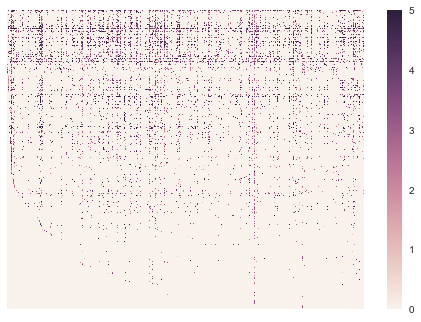

In [19]:
sns.heatmap(Y, yticklabels=False, xticklabels=False);